<a href="https://colab.research.google.com/github/Karla-Flores/Project-04/blob/main/Chicago_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Preprocessing**

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from sklearn.linear_model import SGDClassifier
# import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Uploading ETL file
data = pd.read_csv('../Resources/chicago_crime_db_.csv')
data.head(20)

,Primary Type,Arrest,Domestic,Latitude,Longitude,new_date,hour,month,Location Description
0,BATTERY,False,True,41.815117,-87.670000,2015-09-05 13:30:00,13,9,RESIDENCE
1,THEFT,False,False,41.895080,-87.765400,2015-09-04 11:30:00,11,9,CTA
2,NARCOTICS,True,False,41.937406,-87.716650,2015-09-05 12:45:00,12,9,PUBLIC OPEN SPACE
3,ASSAULT,False,True,41.881903,-87.755121,2015-09-05 13:00:00,13,9,RESIDENCE
4,BURGLARY,False,False,41.744379,-87.658431,2015-09-05 10:55:00,10,9,RESIDENCE
5,BURGLARY,False,False,41.914636,-87.681631,2015-09-04 18:00:00,18,9,RESIDENCE
6,THEFT,True,False,41.851989,-87.689219,2015-09-05 13:00:00,13,9,COMMERCIAL BUILDING
7,ROBBERY,False,True,41.882814,-87.704326,2015-09-05 11:30:00,11,9,PUBLIC OPEN SPACE
8,THEFT,False,False,41.763648,-87.722345,2015-09-05 14:00:00,14,9,PUBLIC OPEN SPACE
9,BATTERY,False,False,41.975968,-87.768014,2015-09-05 11:00:00,11,9,COMMERCIAL BUILDING


In [6]:
# Checking month
data.month.unique()

array([ 9,  7,  3,  8,  4, 10,  5,  1, 12,  6, 11,  2])

In [7]:
# data.month.unique()

In [8]:
# data.new_date.value_counts()

In [9]:
# datecount = data.new_date.value_counts()
# sliced_data = data.loc[datecount[datecount>10]]
# sliced_data.reset_index(drop = True, inplace=True)
# sliced_data.shape

In [10]:
# Return a random sample of items from an axis of object
sliced_data = data.sample(frac=0.01, random_state=1)
sliced_data.reset_index(drop = True, inplace=True)
sliced_data.shape

(66919, 9)

In [11]:
sliced_data

,Primary Type,Arrest,Domestic,Latitude,Longitude,new_date,hour,month,Location Description
0,BATTERY,True,False,41.808918,-87.604362,2010-05-11 15:56:00,15,5,PUBLIC OPEN SPACE
1,MOTOR VEHICLE THEFT,False,False,41.890977,-87.711301,2019-05-15 12:00:00,12,5,PUBLIC OPEN SPACE
2,BURGLARY,False,False,41.806480,-87.752906,2004-02-25 12:00:00,12,2,RESIDENCE
3,THEFT,False,False,41.868173,-87.632289,2018-08-29 11:30:00,11,8,COMMERCIAL BUILDING
4,THEFT,False,False,41.829515,-87.667932,2004-11-08 10:00:00,10,11,PUBLIC OPEN SPACE
...,...,...,...,...,...,...,...,...,...
66914,BURGLARY,False,False,41.801393,-87.659164,2003-09-13 19:50:53,19,9,RESIDENCE
66915,DECEPTIVE PRACTICE,True,False,41.728442,-87.664386,2010-03-16 12:40:00,12,3,PUBLIC OPEN SPACE
66916,THEFT,False,False,41.927103,-87.646391,2006-01-01 18:00:00,18,1,PUBLIC OPEN SPACE
66917,BATTERY,True,True,41.779783,-87.767171,2014-11-15 10:20:00,10,11,RESIDENCE


In [12]:
# Checking hour
sliced_data.hour

0        15
1        12
2        12
3        11
4        10
         ..
66914    19
66915    12
66916    18
66917    10
66918    18
Name: hour, Length: 66919, dtype: int64

In [13]:
# Binning hour
Morning = [5, 6, 7, 8, 9, 10, 11]
Afternoon = [12,13,14,15,16]
Evening = [17, 18, 19, 20]
Night = [21,22,23,0,1,2,3,4]

In [14]:
# Creating a new list to make bins for hour column
HOUR = []

for i in sliced_data.hour:
    if  i in Morning:
        i = "Morning"
        HOUR.append(i)
    elif i in Evening:
        i = "Evening"
        HOUR.append(i)
    elif i in Night:
        i = "Night"
        HOUR.append(i)
    else:
        i = "Afternoon"
        HOUR.append(i)
# print(i)   
# print(HOUR)

In [15]:
# Adding 'Hour' column
sliced_data['HOUR'] = HOUR
sliced_data.head()

,Primary Type,Arrest,Domestic,Latitude,Longitude,new_date,hour,month,Location Description,HOUR
0,BATTERY,True,False,41.808918,-87.604362,2010-05-11 15:56:00,15,5,PUBLIC OPEN SPACE,Afternoon
1,MOTOR VEHICLE THEFT,False,False,41.890977,-87.711301,2019-05-15 12:00:00,12,5,PUBLIC OPEN SPACE,Afternoon
2,BURGLARY,False,False,41.806480,-87.752906,2004-02-25 12:00:00,12,2,RESIDENCE,Afternoon
3,THEFT,False,False,41.868173,-87.632289,2018-08-29 11:30:00,11,8,COMMERCIAL BUILDING,Morning
4,THEFT,False,False,41.829515,-87.667932,2004-11-08 10:00:00,10,11,PUBLIC OPEN SPACE,Morning


In [16]:
# Checking up 'hour' as unique
sliced_data.hour.unique()

array([15, 12, 11, 10, 21,  4, 14, 18, 22, 20,  2, 13, 19,  1, 17,  8,  0,
       23,  7,  5,  9,  3, 16,  6])

In [17]:
# Binning month 
Winter = [ 12, 1, 2 ]
Spring = [3, 4, 5]
Summer = [6, 7, 8]
Autumn = [9, 10, 11]

In [18]:
# Checking up 'hour' as unique
sliced_data.month.unique()

array([ 5,  2,  8, 11,  7, 10,  6,  3, 12,  1,  9,  4])

In [19]:
# Creating a new list to make bins for season column
SEASON = []

for i in sliced_data.month:
    if  i in Winter:
        i = "Winter"
        SEASON.append(i)
    elif i in Spring:
        i = "Spring"
        SEASON.append(i)
    elif i in Summer:
        i = "Summer"
        SEASON.append(i)
    else:
        i = "Autumn"
        SEASON.append(i)
# print(i)   

# print(SEASON)

In [20]:
# Adding 'SEASON' column
sliced_data['SEASON'] = SEASON
sliced_data.tail()

,Primary Type,Arrest,Domestic,Latitude,Longitude,new_date,hour,month,Location Description,HOUR,SEASON
66914,BURGLARY,False,False,41.801393,-87.659164,2003-09-13 19:50:53,19,9,RESIDENCE,Evening,Autumn
66915,DECEPTIVE PRACTICE,True,False,41.728442,-87.664386,2010-03-16 12:40:00,12,3,PUBLIC OPEN SPACE,Afternoon,Spring
66916,THEFT,False,False,41.927103,-87.646391,2006-01-01 18:00:00,18,1,PUBLIC OPEN SPACE,Evening,Winter
66917,BATTERY,True,True,41.779783,-87.767171,2014-11-15 10:20:00,10,11,RESIDENCE,Morning,Autumn
66918,CRIMINAL DAMAGE,False,False,41.970864,-87.667720,2009-09-15 18:36:00,18,9,OTHER,Evening,Autumn


In [21]:
# Dropping columns 'new_date', 'hour', 'month'
sliced_data = sliced_data.drop(['new_date', 'hour', 'month'], axis=1)
sliced_data.head()

,Primary Type,Arrest,Domestic,Latitude,Longitude,Location Description,HOUR,SEASON
0,BATTERY,True,False,41.808918,-87.604362,PUBLIC OPEN SPACE,Afternoon,Spring
1,MOTOR VEHICLE THEFT,False,False,41.890977,-87.711301,PUBLIC OPEN SPACE,Afternoon,Spring
2,BURGLARY,False,False,41.806480,-87.752906,RESIDENCE,Afternoon,Winter
3,THEFT,False,False,41.868173,-87.632289,COMMERCIAL BUILDING,Morning,Summer
4,THEFT,False,False,41.829515,-87.667932,PUBLIC OPEN SPACE,Morning,Autumn


In [22]:
# Convert categorical data to numeric with `pd.get_dummies`
data_dummies = pd.get_dummies(sliced_data, columns = ['Location Description', 'Primary Type', 'HOUR', 'SEASON'],dtype=float)
data_dummies.head()

,Arrest,Domestic,Latitude,Longitude,Location Description_AIRPORT,Location Description_CHURCH,Location Description_COMMERCIAL BUILDING,Location Description_CTA,Location Description_EDUCATIONAL BUILDING,Location Description_FEDERAL PROPERTY,...,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,HOUR_Afternoon,HOUR_Evening,HOUR_Morning,HOUR_Night,SEASON_Autumn,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,True,False,41.808918,-87.604362,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,False,False,41.890977,-87.711301,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,False,False,41.806480,-87.752906,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,False,False,41.868173,-87.632289,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,False,False,41.829515,-87.667932,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [23]:
data_dummies.shape

(66919, 52)

In [25]:
# Split our preprocessed data into our features and target arrays
y = data_dummies.Arrest
X = data_dummies.drop('Arrest', axis=1)

In [26]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [27]:
# Standardizing dataset so columns that contain larger values do not unduly influence the outcome
scaler = StandardScaler().fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [33]:
# Train the Logistic Regression model on the scaled data and print the model score
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print(f'Training Score: {round(model.score(X_train_scaled, y_train)*100,4)}%')
print(f'Testing Score: {round(model.score(X_test_scaled, y_test)*100,4)}%')

Training Score: 86.7102%
Testing Score: 86.6766%


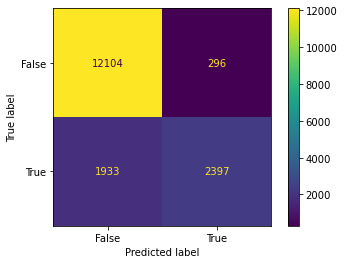

In [34]:
# Confusion Matrix Display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.show()

In [36]:
# Classification Report
from sklearn.metrics import classification_report
y_true = y_test
y_pred = model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.81      1.00      0.90     12400
        True       0.99      0.35      0.52      4330

    accuracy                           0.83     16730
   macro avg       0.90      0.67      0.71     16730
weighted avg       0.86      0.83      0.80     16730



# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest classifier model on the scaled data and print the model score
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train_scaled, y_train)

print(f'Training Score: {round(model.score(X_train_scaled, y_train)*100,4)}%')
print(f'Testing Score: {round(model.score(X_test_scaled, y_test)*100,4)}%')

Training Score: 99.741%
Testing Score: 85.5589%


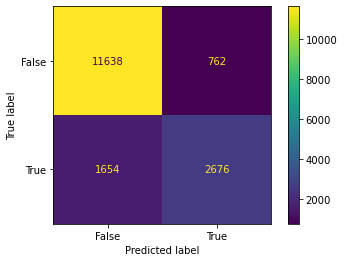

In [38]:
# Confusion Matrix Display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.show()

In [39]:
# Classification Report
from sklearn.metrics import classification_report
y_true = y_test
y_pred = model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.99      0.85     12400
        True       0.10      0.00      0.00      4330

    accuracy                           0.74     16730
   macro avg       0.42      0.50      0.43     16730
weighted avg       0.57      0.74      0.63     16730

